In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from dataset import Dataset
from model import Model

dataset = Dataset(scale=5.0)
model = Model()
model.load("saved")

loaded: saved


In [4]:
bar_images_short = dataset.get_bar_images(is_short=True)
bar_images_long  = dataset.get_bar_images(is_short=False)

rs, r_tds, rh, error_tds = model.apply_images(bar_images_short, training=False)
r_long = rs[32:64]
r_td_long = r_tds[32:64]
error_tds_long = error_tds[32:64]

rs, r_tds, rh, error_tds = model.apply_images(bar_images_long, training=False)
r_short = rs[32:64]
r_td_short = r_tds[32:64]
error_tds_short = error_tds[32:64]

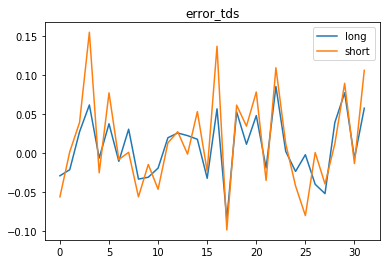

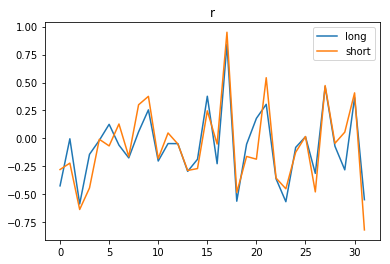

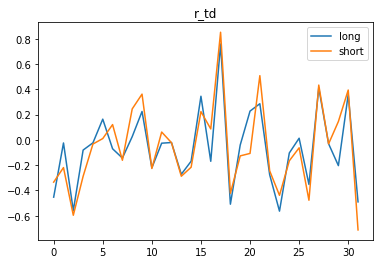

In [5]:
plt.title("error_tds")
plt.plot(error_tds_long, label="long")
plt.plot(error_tds_short, label="short")
plt.legend()
plt.show()

plt.title("r")
plt.plot(r_long, label="long")
plt.plot(r_short, label="short")
plt.legend()
plt.show()

plt.title("r_td")
plt.plot(r_td_long, label="long")
plt.plot(r_td_short, label="short")
plt.legend()
plt.show()

In [6]:
print(np.std(model.Uh))
print(np.std(model.Us))

1.9734921896067952
2.5789680846374154


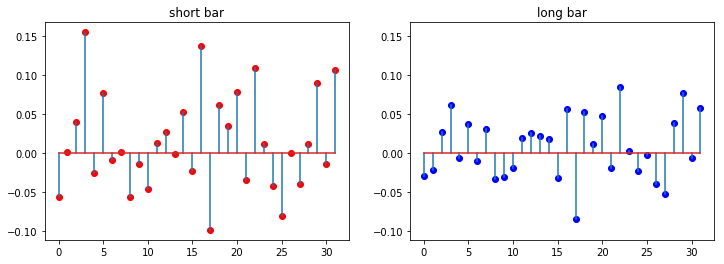

In [7]:
max_value = np.max([np.max(error_tds_long), np.max(error_tds_short)])
min_value = np.min([np.min(error_tds_long), np.min(error_tds_short)])
mid_value = (max_value + min_value) / 2
value_range = max_value - min_value

plt.figure(figsize=(12, 4)) # figureの縦横の大きさ

plt.subplot(1,2,1)
plt.title("short bar")
plt.ylim([mid_value - (value_range/2) * 1.1, mid_value + (value_range/2) * 1.1])
plt.stem(list(range(len(error_tds_short))), error_tds_short, label='short',
        markerfmt='ro')

plt.subplot(1,2,2)
plt.title("long bar")
plt.ylim([mid_value - (value_range/2) * 1.1, mid_value + (value_range/2) * 1.1])
plt.stem(list(range(len(error_tds_long))), error_tds_long, label='long',
        markerfmt='bo')
plt.show()

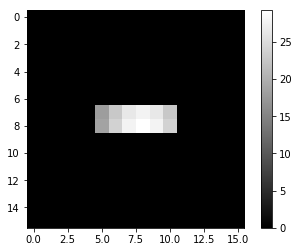

In [8]:
bar_images_short = dataset.get_bar_images(is_short=True)

plt.figure()
plt.imshow(bar_images_short[1].reshape([16,16]), cmap='gray')
plt.colorbar()
plt.show()

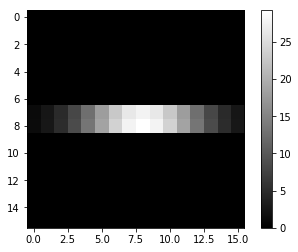

In [9]:
bar_images_long = dataset.get_bar_images(is_short=False)

plt.figure()
plt.imshow(bar_images_long[1].reshape([16,16]), cmap='gray')
plt.colorbar()
plt.show()

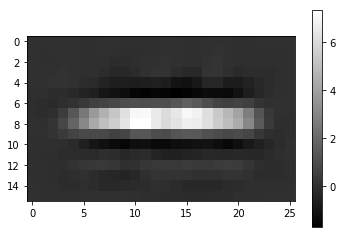

In [9]:
patch1 = model.reconstruct(rs, level=1)
plt.figure()
plt.imshow(patch1, cmap='gray')
plt.colorbar()
plt.show()

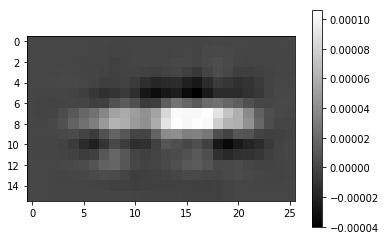

In [10]:
patch2 = model.reconstruct(rh, level=2)
plt.figure()
#plt.imshow(patch2 * 80000, cmap='gray')
plt.imshow(patch2, cmap='gray')
plt.colorbar()
plt.show()

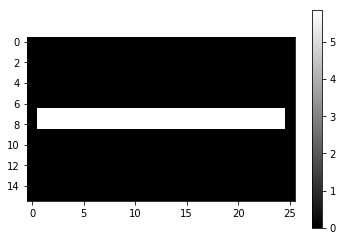

In [15]:
bar_patch_long = dataset.get_bar_patch(is_short=False)
plt.figure()
plt.imshow(bar_patch_long, cmap='gray')
plt.colorbar()
plt.show()

### なぜかr_tdsがrsに比例した内容で小さくなっている

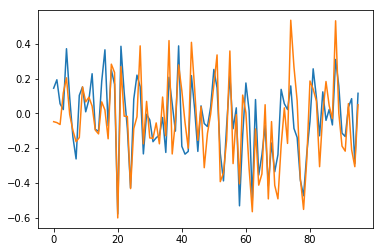

In [12]:
plt.plot(rs)
plt.plot(r_tds * 80000)
plt.show()

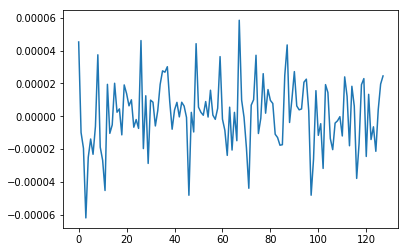

In [13]:
plt.plot(rh)
plt.show()